This notebook we try to visualize hydathode distribution of 4 samples by setting the petiole to tip length to be the same scale, and align them in the same direction.  

### Note to self:

This is perhaps the more sophisticated version of the  Procruste analysis that we will do later:

- https://medium.com/@olga_kravchenko/generalized-procrustes-analysis-with-python-numpy-c571e8e8a421

- what might be useful for the contour: elliptical Fourier descriptors (EFDs)

In [1]:
import graph_create, voronoi_local, jaccard_similarity, figure_plot

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu
from scipy.spatial import Voronoi

import os
import cv2
import networkx as nx
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
import math
import matplotlib as mpl

### REMEMBER: we rotate the pet/tip images left by 90 and flipped vertically, after save it from SketchbookPro.

In [2]:
C_dot_folder = 'environmental/dot_images/control_dots'
C_vein_folder = 'environmental/vein_graphs/control_txt'

In [3]:
def anchored(sample):
    G = graph_create.graph_creation(sample, dot_folder= C_dot_folder, vein_folder= C_vein_folder)
    tip_file = f'dot_alignment/{sample}_tip.jpg'
    pet_file = f'dot_alignment/{sample}_pet.jpg'
    add_pet_n_tip(G, tip_file, pet_file)

    print('- Addition Step6: finish adding anchor points.')

    return G
    

In [4]:
def add_pet_n_tip(G, tip_file, pet_file):
    
    G_anchor = nx.Graph()

    img = cv2.imread(tip_file, 0)
    th, threshed = cv2.threshold(img, 100, 255,  cv2.THRESH_BINARY_INV|cv2.THRESH_OTSU)
    # output contour list for dots:
    contour = cv2.findContours(threshed, cv2.RETR_LIST,  cv2.CHAIN_APPROX_SIMPLE)[-2]

    if len(contour) == 1:
        
        x_cor = np.around(np.array([contour[0][i][0][0] for i in range(contour[0].shape[0])]).mean(), 2)
        y_cor = np.around(np.array([contour[0][i][0][1] for i in range(contour[0].shape[0])]).mean(), 2)

    tip = (x_cor, y_cor)
    G.graph['tip'] = tip
    G.add_node(tip, type = 'tip')   


    img = cv2.imread(pet_file, 0)
#    img = imutils.rotate(img, 90)

    th, threshed = cv2.threshold(img, 100, 255,  cv2.THRESH_BINARY_INV|cv2.THRESH_OTSU)
    # output contour list for dots:
    contour = cv2.findContours(threshed, cv2.RETR_LIST,  cv2.CHAIN_APPROX_SIMPLE)[-2]

    if len(contour) == 1:
        x_cor = np.around(np.array([contour[0][i][0][0] for i in range(contour[0].shape[0])]).mean(), 2)
        y_cor = np.around(np.array([contour[0][i][0][1] for i in range(contour[0].shape[0])]).mean(), 2)

    pet = (x_cor, y_cor)
    G.graph['pet'] = pet
    G.add_node(pet, type = 'pet') 

    

In [5]:
def quick_plot(G):
    '''
    quick plotting for spatial graphs with attr "pos" as a length 2 coordinate vector  
    before we change corr.
    '''
    node_positions = {}
    color_dict = {'vein':'C0', 'dot': 'C7', 'single_dot': 'C1', 'tip':  'C4','pet':'C5'}
    node_color = []
    
    for node in G.nodes:
        node_positions[node] = node
        node_color.append(color_dict[G.nodes[node]['type']])
    
    fig, ax = plt.subplots(figsize=(8, 8/G.graph['ratio']))
   
    nx.draw(G, pos=node_positions, node_size= 30, node_color= node_color, ax = ax) 
    
    plt.tight_layout()
    plt.show()   
        
    return


In [6]:
sample = 'C1-1'
G = anchored(sample)

G_1 = anchored('C1-4')
G_2 = anchored('C1-2')
G_3 = anchored('C1-5')

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

Graph creation completed.

- Addition Step6: finish adding anchor points.
Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

Graph creation completed.

- Addition Step6: finish adding anchor points.
Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

Graph creation completed.

- Addition Step6: finish adding anchor points.
Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

In [7]:
# the anchoroing vector and distance:

def get_vec(G):
    vec = (G.graph['pet'][0]- G.graph['tip'][0], G.graph['pet'][1]- G.graph['tip'][1])
    dist = np.linalg.norm(vec)
    unit_vec = vec /dist

    return unit_vec, dist

In [8]:
def get_angle(vec, vec_prime):
    dot_product = np.dot(vec, vec_prime)
    angle = np.arccos(dot_product)
    return angle

In [9]:
### rotation:

def rotate(origin, point, angle):
    """
    Rotate a point counterclockwise by a given angle around a given origin.

    The angle should be given in radians.
    """
    ox, oy = origin
    px, py = point

    qx = ox + np.cos(angle) * (px - ox) - np.sin(angle) * (py - oy)
    qy = oy + np.sin(angle) * (px - ox) + np.cos(angle) * (py - oy)
    
    return (qx, qy)


In [10]:
vec, dist = get_vec(G)
vec_1, dist_1 = get_vec(G_1)
vec_2, dist_2 = get_vec(G_2)
vec_3, dist_3 = get_vec(G_3)


In [11]:
angle_1 = get_angle(vec, vec_1)
angle_2 = get_angle(vec, vec_2)
angle_3 = get_angle(vec, vec_3)

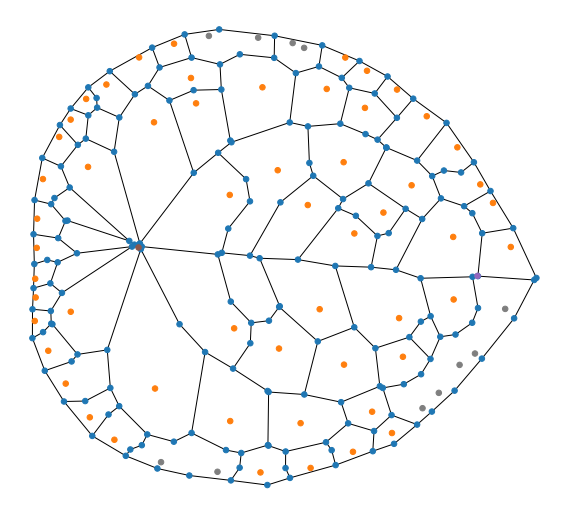

In [12]:
quick_plot(G)

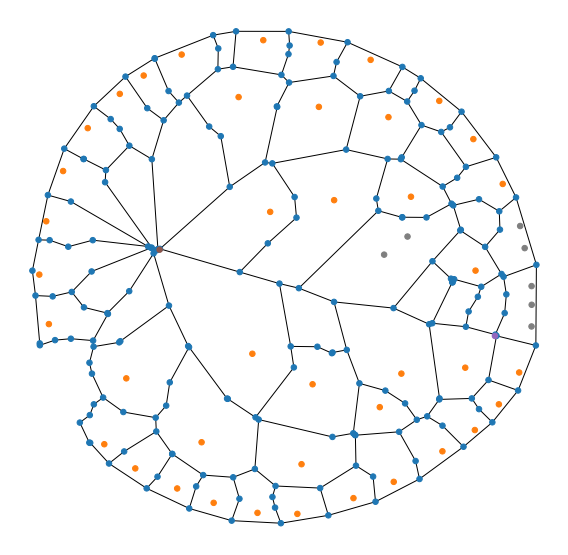

In [13]:
quick_plot(G_1)

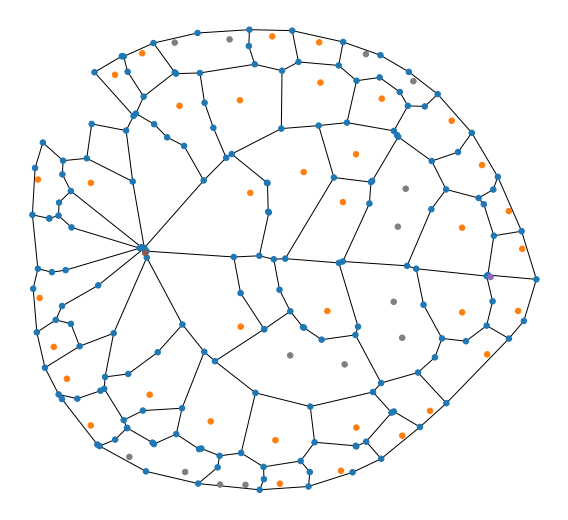

In [14]:
quick_plot(G_2)

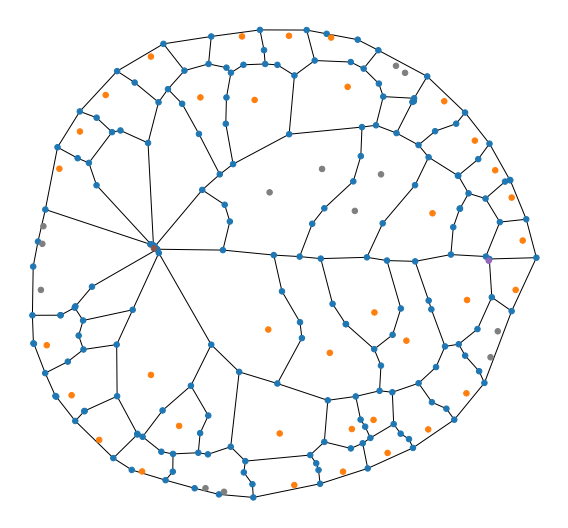

In [15]:
quick_plot(G_3)

In [16]:
### this is to fix them all to the same orientation first (vertical, dk if needs to be changed later)

for node in G.nodes:
    pos = rotate(G.graph['pet'], node, 4.71)
    G.nodes[node]['pos'] = pos

for node in G_1.nodes:
    pos = rotate(G_1.graph['pet'], node, 4.71)
    G_1.nodes[node]['pos'] = pos

for node in G_2.nodes:
    pos = rotate(G_2.graph['pet'], node, 4.71)
    G_2.nodes[node]['pos'] = pos

for node in G_3.nodes:
    pos = rotate(G_3.graph['pet'], node, 4.71)
    G_3.nodes[node]['pos'] = pos

In [17]:
def plot_pos(G):
    '''
    quick plotting for spatial graphs with attr "pos" as a length 2 coordinate vector  
    '''
    node_positions = {}
    color_dict = {'vein':'C0', 'dot': 'C7', 'single_dot': 'C1', 'tip':  'C4','pet':'C5'}
    node_color = []
    
    for node in G.nodes:
        node_positions[node] = G.nodes[node]['pos']
        node_color.append(color_dict[G.nodes[node]['type']])
    
    fig, ax = plt.subplots(figsize=(8, 8*G.graph['ratio'])) # since we rotate 90 the ratio is the exact opposite.
   
    nx.draw(G, pos=node_positions, node_size= 30, node_color= node_color, ax = ax) 
    
    plt.tight_layout()
    plt.show()   
        
    return

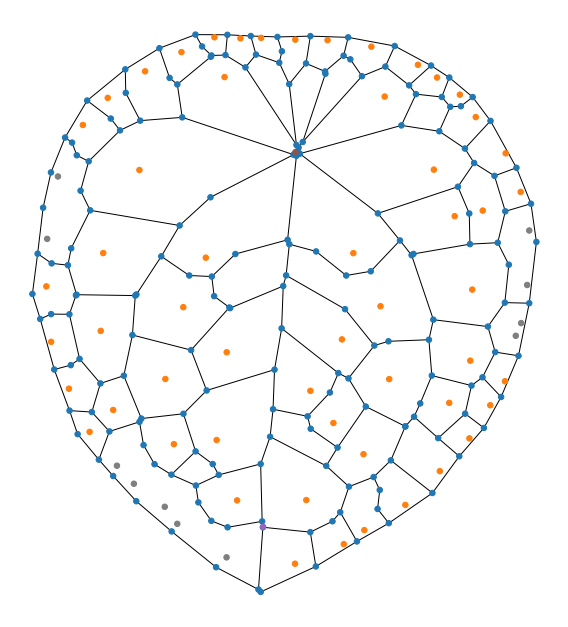

In [18]:
plot_pos(G)

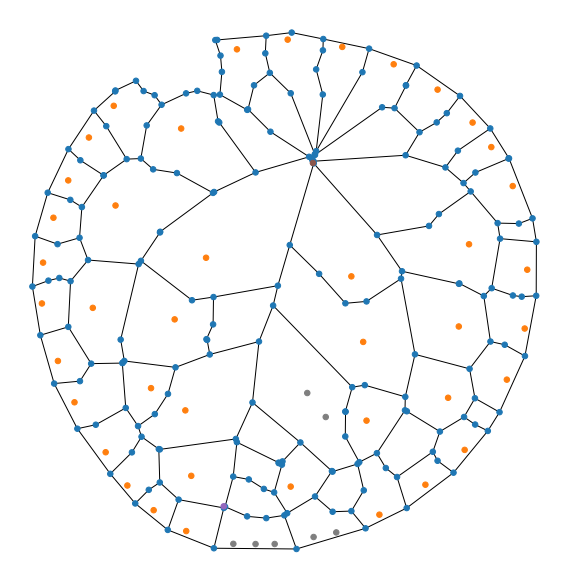

In [19]:
plot_pos(G_1)

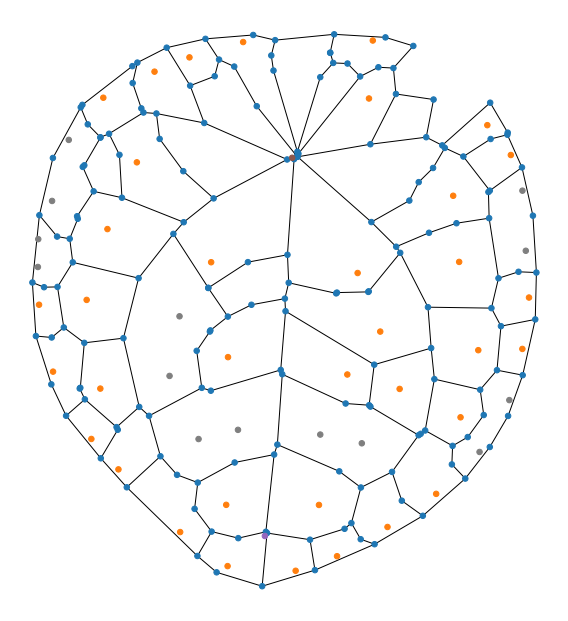

In [20]:
plot_pos(G_2)

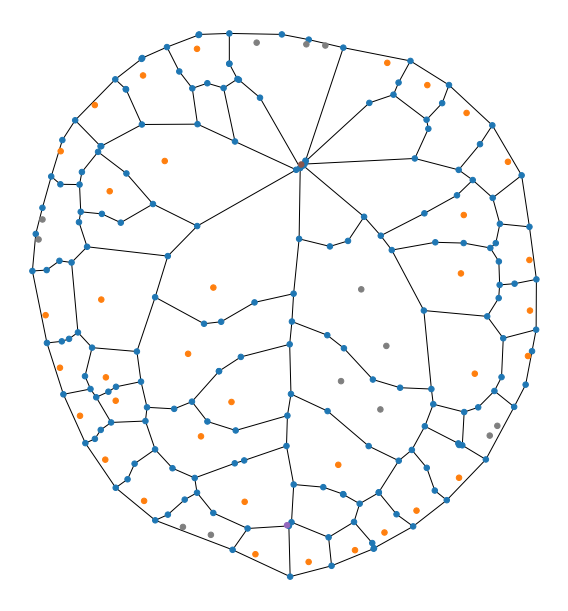

In [21]:
plot_pos(G_3)

In [22]:
# reset G boundary to be after rotation: 
new_boundary = []
for node in G.graph['boundary']:
    new_pos = rotate(G.graph['pet'], node, 4.71) # 4.71 was to make up the first rotation
    new_boundary.append(new_pos)

G.graph['boundary'] = new_boundary

In [23]:
def change_coor(G, G_prime, dist_prime, angle):

    'steps to stretch G_prime the same orientation and scale as G.'
    
    streach = dist/dist_prime
    x_move = G.graph['pet'][0] -G_prime.graph['pet'][0] 
    y_move = G.graph['pet'][1] -G_prime.graph['pet'][1] 

   
    for node in G_prime.nodes:
        # shift:
        new_pos = (G_prime.nodes[node]['pos'][0] + x_move, G_prime.nodes[node]['pos'][1] + y_move)

        # rotate:
        new_pos = rotate(G.graph['pet'], new_pos, angle)

        # streach:
        new_pos =(G.graph['pet'][0] + (new_pos[0] - G.graph['pet'][0])*streach,
                G.graph['pet'][1] + (new_pos[1] - G.graph['pet'][1])*streach)
        
        # assign new pos:
        G_prime.nodes[node]['pos'] = new_pos   
    
    new_boundary = []

    for node in G_prime.graph['boundary']:

        new_x = node[0] + x_move
        new_y = node[1] + y_move

        (new_x, new_y) = rotate(G.graph['pet'], (new_x, new_y), angle + 4.71) # 4.71 was to make up the first rotation

        new_x = G.graph['pet'][0] + (new_x - G.graph['pet'][0])*streach
        new_y = G.graph['pet'][1] + (new_y - G.graph['pet'][1])*streach

        new_boundary.append((new_x, new_y))

        G_prime.graph['boundary'] = new_boundary

In [24]:
change_coor(G, G_1, dist_1, angle_1)
change_coor(G, G_2, dist_2, angle_2)
change_coor(G, G_3, dist_3, angle_3)

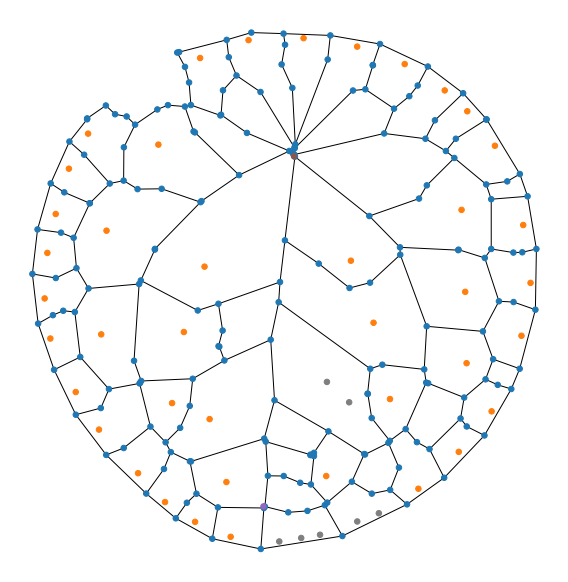

In [25]:
plot_pos(G_1)

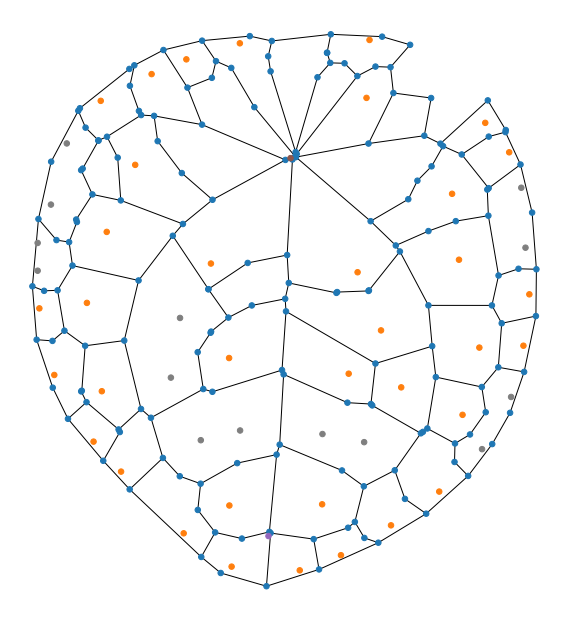

In [26]:
plot_pos(G_2)

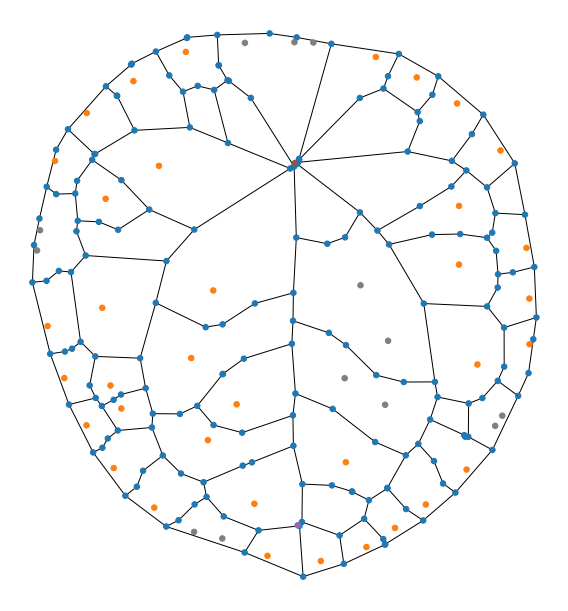

In [27]:
plot_pos(G_3)

#### Apply it on the hydathodes:

In [28]:
def get_hydathodes(G):
    nodes = (
        node
        for node, data
        in G.nodes(data=True)
        if (data.get("type") == "dot" or data.get("type") == "single_dot")
    )
    G_subgraph = G.subgraph(nodes)

    return G_subgraph

In [29]:
G_sub = get_hydathodes(G)
G_1_sub = get_hydathodes(G_1)
G_2_sub = get_hydathodes(G_2)
G_3_sub = get_hydathodes(G_3)

In [30]:
boundary = G.graph['boundary'] # ahhhhh this need to be modified too
boundary_1 = G_1.graph['boundary']
boundary_2 = G_2.graph['boundary']
boundary_3 = G_3.graph['boundary']

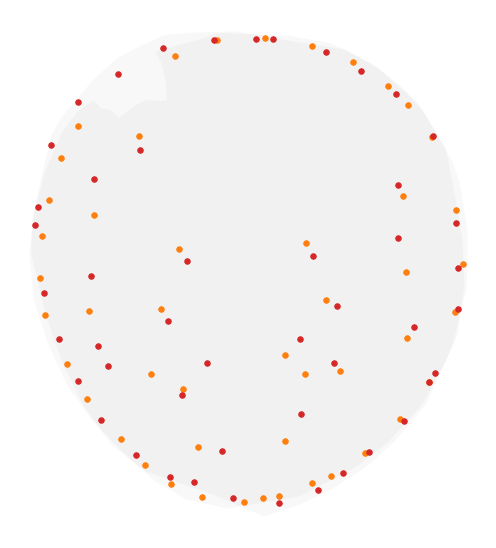

In [31]:
node_positions_1 = {}
node_positions_3 = {}

    
for node in G_1_sub.nodes:
    node_positions_1[node] = G_1_sub.nodes[node]['pos']


for node in G_3_sub.nodes:
    node_positions_3[node] = G_3_sub.nodes[node]['pos']

fig, ax = plt.subplots(1,1, figsize=(7, 7*G.graph['ratio']))

nx.draw(G_1_sub, pos=node_positions_1, node_size= 30, node_color = "C1", ax = ax) 
nx.draw(G_3_sub, pos=node_positions_3, node_size= 30, node_color = "C3", ax = ax) 


p1 = mpl.patches.Polygon(boundary_1, facecolor = 'grey', alpha = .05)
ax.add_patch(p1)

p3 = mpl.patches.Polygon(boundary_3, facecolor = 'grey', alpha = .05)
ax.add_patch(p3)

plt.tight_layout()
plt.show()   

fig.savefig('hydathode_of_two.pdf')


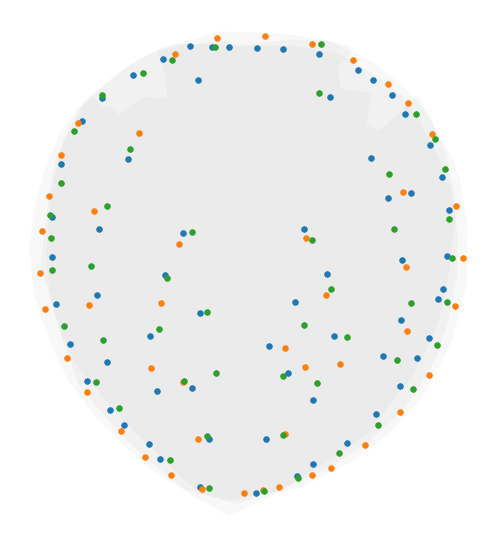

In [32]:
node_positions = {}
node_positions_1 = {}
node_positions_2 = {}
node_positions_3 = {}


for node in G_sub.nodes:
    node_positions[node] = G_sub.nodes[node]['pos']
    
for node in G_1_sub.nodes:
    node_positions_1[node] = G_1_sub.nodes[node]['pos']

for node in G_2_sub.nodes:
    node_positions_2[node] = G_2_sub.nodes[node]['pos']

for node in G_3_sub.nodes:
    node_positions_3[node] = G_3_sub.nodes[node]['pos']

fig, ax = plt.subplots(1,1, figsize=(7, 7*G.graph['ratio']))

nx.draw(G_sub, pos=node_positions, node_size= 30,  node_color = "C0",  ax = ax) 
nx.draw(G_1_sub, pos=node_positions_1, node_size= 30, node_color = "C1", ax = ax) 
nx.draw(G_2_sub, pos=node_positions_2, node_size= 30, node_color = "C2", ax = ax) 
# nx.draw(G_3_sub, pos=node_positions_3, node_size= 30, node_color = "C3", ax = ax) 


p = mpl.patches.Polygon(boundary, facecolor = 'grey', alpha = .05)
ax.add_patch(p)
p1 = mpl.patches.Polygon(boundary_1, facecolor = 'grey', alpha = .05)
ax.add_patch(p1)
p2 = mpl.patches.Polygon(boundary_2, facecolor = 'grey', alpha = .05)
ax.add_patch(p2)
# p3 = mpl.patches.Polygon(boundary_3, facecolor = 'grey', alpha = .05)
# ax.add_patch(p3)

plt.tight_layout()
plt.show()   


fig.savefig('hydathode_of_four(3).pdf')

### Matching of nodes:

In [33]:
# import random # for debug purposes

G_nodes =  list(G_sub.nodes)
G_pos = list(nx.get_node_attributes(G_sub,'pos').values())
# random.shuffle(G_nodes)


G_1_nodes = list(G_1_sub.nodes)
G_1_pos = list(nx.get_node_attributes(G_1_sub,'pos').values())

# random.shuffle(G_1_nodes)


In [34]:
len(G_1_nodes)

48

In [35]:
G_2_nodes = list(G_2_sub.nodes)
len(G_2_nodes)

50

In [36]:
G_3_nodes = list(G_3_sub.nodes)
print(len(G_3_nodes))
G_3_pos = list(nx.get_node_attributes(G_3_sub,'pos').values())


49


In [37]:
from scipy.spatial.distance import cdist
from scipy.optimize import linear_sum_assignment

In [38]:
dist_mat = cdist(G_1_pos, G_3_pos, 'euclidean')    
row_ind, col_ind = linear_sum_assignment(dist_mat, maximize= False)

In [39]:
len(col_ind)

48

In [40]:
row_ind

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47])

In [41]:
col_ind

array([42, 43, 13, 16, 30,  5, 44, 22, 27, 34, 32, 14, 46, 41, 33, 23, 10,
       28, 11, 45, 20,  0, 36, 18, 37, 47, 35, 29,  9,  2,  3, 12,  1,  6,
       31, 40, 19,  7, 17, 26, 48, 15, 21, 25,  8,  4, 39, 38])

In [42]:
for i in range(len(col_ind)):
    dot = G_1_nodes[row_ind[i]]
    dot_prime = G_3_nodes[col_ind[i]]

    G_1.nodes[dot]['color'] = i/len(G_3_nodes)
    G_3.nodes[dot_prime]['color'] = i/len(G_3_nodes)

# take care of the rest:
not_matched = [i  for i in range(len(G_3_nodes)) if i not in col_ind ]

print(not_matched)

for i in range(len(not_matched)):
    dot_prime = G_3_nodes[not_matched[i]]
    G_3.nodes[dot_prime]['color'] = 1

[24]


In [43]:
G_matches = dist_mat.argmax(axis=0) # local best; don't need this

# for i in range(len(G_matches)):
#     dot = G_nodes[i]
#     dot_prime = G_1_nodes[G_matches[i]]
#     G.nodes[dot]['color'] = i/len(G_nodes)
#     G_1.nodes[dot_prime]['color'] = i/len(G_nodes)

# not_matched = [i  for i in range(len(G_1_nodes)) if i not in G_matches.tolist() ]

# print(not_matched)

# for i in range(len(not_matched)):
#     dot = G_nodes[not_matched[i]]
#     G.nodes[dot]['color'] = 1

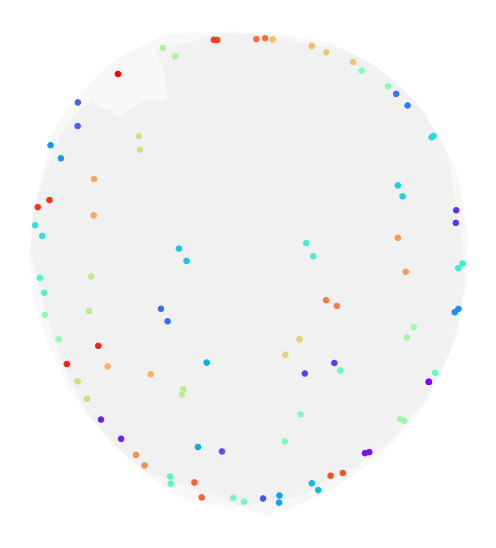

In [44]:
fig, ax = plt.subplots(1,1, figsize=(7, 7*G.graph['ratio']))

nx.draw(G_3_sub, pos=nx.get_node_attributes(G_3_sub,'pos'), 
                node_size= 30,   
                node_color =list(nx.get_node_attributes(G_3_sub,'color').values()),
                vmin = 0,
                vmax = 1,
                cmap = plt.cm.get_cmap('rainbow'),
                ax = ax) 

nx.draw(G_1_sub, pos=nx.get_node_attributes(G_1_sub,'pos'), 
                node_size= 30,   
                node_color =list(nx.get_node_attributes(G_1_sub,'color').values()),
                vmin = 0,
                vmax = 1,
                cmap = plt.cm.get_cmap('rainbow'),
                ax = ax) 


p1 = mpl.patches.Polygon(boundary_1, facecolor = 'grey', alpha = .05)
ax.add_patch(p1)
p3 = mpl.patches.Polygon(boundary_3, facecolor = 'grey', alpha = .05)
ax.add_patch(p3)

plt.tight_layout()
plt.show()   

fig.savefig('matched_2.pdf')


In [45]:
G_composed = nx.compose(G_3_sub, G_1_sub)

In [46]:
for i, node in enumerate(G_1_nodes):
    # add an edge for all matched nodes:
    G_composed.add_edge(node, G_3_nodes[col_ind[i]], color = G_1_sub.nodes[node]['color'])

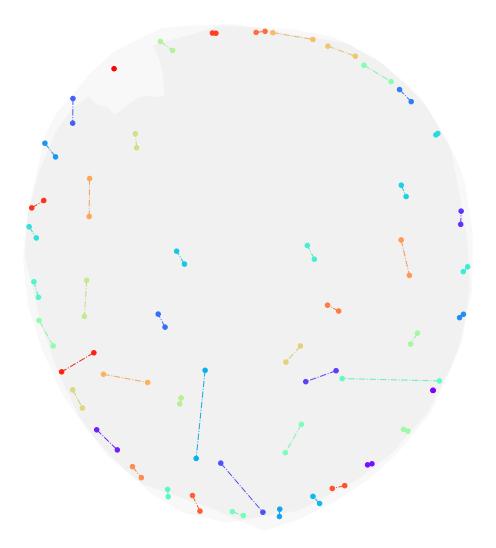

In [47]:
fig, ax = plt.subplots(1,1, figsize=(7, 7*G.graph['ratio']))

edge_color = []

for edge in G_composed.edges:
    edge_color.append(G_composed.edges[edge]['color'])

nx.draw(G_composed, pos=nx.get_node_attributes(G_composed,'pos'), 
                node_size= 20,   
                node_color =list(nx.get_node_attributes(G_composed,'color').values()),
                edge_color = edge_color,
                vmin = 0,
                vmax = 1,
                cmap = plt.cm.get_cmap('rainbow'),
                edge_vmin = 0, 
                edge_vmax = 1,
                edge_cmap = plt.cm.get_cmap('rainbow'),
                style = '-.',
                ax = ax)  

p1 = mpl.patches.Polygon(boundary_1, facecolor = 'grey', alpha = .05)
ax.add_patch(p1)
p3 = mpl.patches.Polygon(boundary_3, facecolor = 'grey', alpha = .05)
ax.add_patch(p3)

plt.tight_layout()
plt.show() 

fig.savefig('matched_connected_2.pdf')